## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\GnuWin32/etc/wgetrc
--2021-12-04 17:33:35--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Risoluzione di www.dropbox.com... 162.125.66.18
Connessione a www.dropbox.com|162.125.66.18|:443... connesso.
ERRORE: impossibile verificare il certificato di www.dropbox.com, rilasciato da "/C=US/O=DigiCert Inc/OU=www.digicert.com/CN=DigiCert SHA2 High Assurance Server CA":
  Impossibile verificare localmente l'autorit� dell'emittente.
Per connettersi a www.dropbox.com in modo non sicuro, usare "--no-check-certificate".
Impossibile stabilire una connessione SSL.


1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [2]:
import pandas as pd
import numpy as np
from IPython.display import display

In [13]:
#Exercise 1

file = 'data_000637.txt'
file = pd.read_csv(file)

#N = int(input())
N = len(file)

if N <= len(file) and N > 10000:
    data = pd.DataFrame(file[:N])
    display(data)
elif N < 10000:
    print('N must be higher then 10k.')
else:
    print('N is bigger then file dimension.')


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


In [18]:
#Exercise 2

x = data['BX_COUNTER'].max() - data['BX_COUNTER'].min() + 1
print('The x value is:', x)

The x value is: 3564


In [33]:
#Exercise 3

time = (data['ORBIT_CNT'][len(data)-1] - data['ORBIT_CNT'][0])*x*25*10**(-9)
print('The data taking lasted', round(time,2), 's.')


The data taking lasted 0.98 s.


In [34]:
#Exercise 4

data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25+x*25*data['ORBIT_CNT']
data['timens'] -= data['timens'][0]

display(data)


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,timens
0,1,0,123,3869200167,2374,26,0.000000e+00
1,1,0,124,3869200167,2374,27,8.125000e-01
2,1,0,63,3869200167,2553,28,4.476625e+03
3,1,0,64,3869200167,2558,19,4.594125e+03
4,1,0,64,3869200167,2760,25,9.649125e+03
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,9.804161e+08
1310716,1,1,4,3869211171,763,11,9.804161e+08
1310717,1,0,64,3869211171,764,0,9.804161e+08
1310718,1,0,139,3869211171,769,0,9.804163e+08


In [35]:
#Exercise 5

data['HEAD'] = np.array([np.random.randint(2) for i in range(len(data))])

display(data)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,timens
0,1,0,123,3869200167,2374,26,0.000000e+00
1,1,0,124,3869200167,2374,27,8.125000e-01
2,1,0,63,3869200167,2553,28,4.476625e+03
3,1,0,64,3869200167,2558,19,4.594125e+03
4,0,0,64,3869200167,2760,25,9.649125e+03
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,9.804161e+08
1310716,1,1,4,3869211171,763,11,9.804161e+08
1310717,0,0,64,3869211171,764,0,9.804161e+08
1310718,1,0,139,3869211171,769,0,9.804163e+08


In [13]:
#Exercise 6

new_data = data[data['HEAD'] == 1]

display(new_data)


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,timens
2,1,0,63,3869200167,2553,28,63848.333333
3,1,0,64,3869200167,2558,19,63965.833333
5,1,0,63,3869200167,2762,4,69053.333333
7,1,0,139,3869200167,2776,0,69400.000000
8,1,0,62,3869200167,2774,21,69367.500000
...,...,...,...,...,...,...,...
999991,1,0,59,3869209011,2558,9,63957.500000
999992,1,0,49,3869209011,2557,3,63927.500000
999994,1,0,60,3869209011,2561,27,64047.500000
999997,1,0,61,3869209011,2562,2,64051.666667


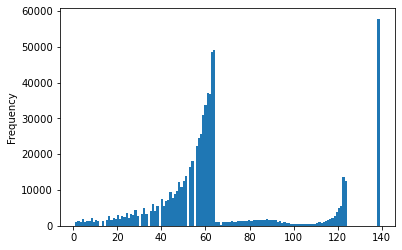

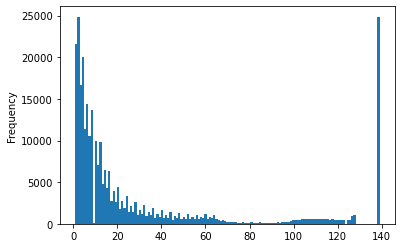

In [22]:
#Exercise 7
import matplotlib.pyplot as plt

FPGA_0 = data[data['FPGA'] == 0]
FPGA_0['TDC_CHANNEL'].plot.hist(bins=FPGA_0['TDC_CHANNEL'].max())
plt.show()

FPGA_1 = data[data['FPGA'] == 1]
FPGA_1['TDC_CHANNEL'].plot.hist(bins=FPGA_1['TDC_CHANNEL'].max())
plt.show()




In [58]:
#Exercise 8

data.groupby('TDC_CHANNEL')['TDC_CHANNEL'].count().sort_values(ascending=False)

TDC_CHANNEL
139    82677
64     50201
63     49335
61     37789
62     37602
       ...  
125      457
130       53
138       52
137       50
129       28
Name: TDC_CHANNEL, Length: 133, dtype: int64

In [57]:
#Exercise 9

unique = data['ORBIT_CNT'].nunique()
print('There are', unique, 'unique orbits.\n')

unique = data[data['TDC_CHANNEL'] == 139]['ORBIT_CNT'].nunique()
print('There are', unique, 'unique orbits with at least one count in the TDC channel 139.\n')

There are 8841 unique orbits.

There are 8816 unique orbits with at least one count in the TDC channel 139.

